## Basics of network analysis

https://github.com/socialcomquant/summer-school-2022/blob/main/Day2_Tizzoni_Network_Analysis/2_network_analysis.ipynb

DataSet : https://snap.stanford.edu/data/ca-AstroPh.html

This is data of undirected graphs with the links representing co-authorship


Topics covered:
- Clustering Coefficient
- [ToDo] Shortest Paths
- [ToDo] Centrality Measure

In [2]:
import networkx as nx

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
path = './Data/ca-AstroPh.txt'

In [6]:
df = pd.read_csv(path, sep = '\t')
df.head()

,# FromNodeId,ToNodeId
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229


In [7]:
G = nx.Graph()

In [8]:
for i in list(range(0, len(df),1)):
    G.add_edge(df['# FromNodeId'][i],df['ToNodeId'][i])

In [9]:
len(G.nodes())

18772

In [10]:
len(G.edges())

198110

#### Components in connected graphs

In [11]:
nx.is_connected(G)
#This should be false if there are components

False

In [12]:
nx.number_connected_components(G)

290

In [13]:
Node_Len = []
for k in nx.connected_components(G):
    Node_Len = np.append(Node_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.

In [14]:
len(Node_Len)

290

In [15]:
max(Node_Len)

17903.0

In [16]:
Components = list(nx.connected_components(G))

In [17]:
pos = 0
for j in range(1,len(Components),1):
    
    if(len(Components[j]) == max(Node_Len)):
        pos = j

#There would be a better sorting algo

In [18]:
len(Components[pos])

17903

In [19]:
G_C_Max = G.subgraph(Components[pos])

In [20]:
len(G_C_Max.nodes())
nx.is_connected(G_C_Max)
#This subgraphs is connected. #Could also be the largest co-author community.
len(G) - len(G_C_Max)

869

In [21]:
#Number of triangles in the graph
tt = sum(list(nx.triangles(G_C_Max).values()))/3

In [22]:
#Total number of possible triangles, Here the triplets could also be open and hence not needed to be all 3
tpt = math.factorial(len(G_C_Max.nodes()))/(math.factorial(3) * math.factorial(len(G_C_Max.nodes()) - 3))

In [23]:
#Transitivity
4050042/956210276151.0

nx.transitivity(G_C_Max)

0.31777791273391154

In [24]:
#Would like to print the distribution of the local clustering coefficients. This would give the centralised?
ClusteringCoefL = nx.clustering(G_C_Max)

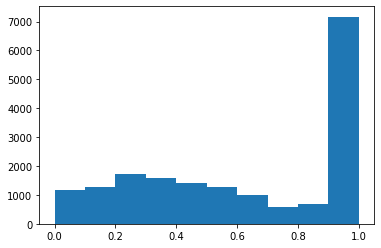

In [25]:
#The key would be the node id
plt.hist(ClusteringCoefL.values())
plt.show()
#This would mean, it is quiete a connected graphs, a majority of neighbours are connected with the neighbours.

In [26]:
nx.average_clustering(G_C_Max)

0.6328232091518589

# Rough

In [27]:
Node_Len.sort()

(array([141., 120.,  17.,   3.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

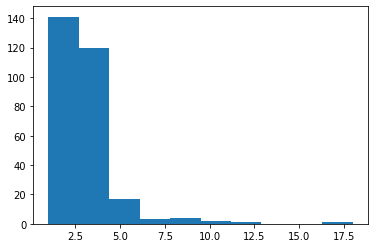

In [28]:
plt.hist(Node_Len[0:289])